In [ ]:
`from google.colab import files
uploaded = files.upload()

Saving Invistico_Airline.csv.zip to Invistico_Airline.csv (2).zip


In [ ]:
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
from scipy.stats import ttest_ind


with zipfile.ZipFile('Invistico_Airline.csv.zip')as z:
  with z.open('Invistico_Airline.csv')as f:
    flight_df = pd.read_csv(f)

flight_df = flight_df.dropna()
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129487 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129487 non-null  object 
 1   Gender                             129487 non-null  object 
 2   Customer Type                      129487 non-null  object 
 3   Age                                129487 non-null  int64  
 4   Type of Travel                     129487 non-null  object 
 5   Class                              129487 non-null  object 
 6   Flight Distance                    129487 non-null  int64  
 7   Seat comfort                       129487 non-null  int64  
 8   Departure/Arrival time convenient  129487 non-null  int64  
 9   Food and drink                     129487 non-null  int64  
 10  Gate location                      129487 non-null  int64  
 11  Inflight wifi service              129487 no

In [ ]:
flight_df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [ ]:
flight_df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,39.428761,1981.008974,2.838586,2.990277,2.852024,2.990377,3.249160,3.383745,3.519967,3.472171,3.465143,3.486118,3.695460,3.340729,3.705886,3.352545,14.643385,15.091129
std,15.117597,1026.884131,1.392873,1.527183,1.443587,1.305917,1.318765,1.345959,1.306326,1.305573,1.270755,1.292079,1.156487,1.260561,1.151683,1.298624,37.932867,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1924.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2543.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


##**CLUSTER ANALYSIS**
- Finding groups of very happy and very unhappy customers and see if there are any commonalities in the kinds of things they like and dislike.

In [ ]:
cluster_means = flight_df.groupby('cluster')[features].mean()
cluster_means

,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
cluster,,,,,,,,,,,,,,,
0,2.030026,2.739993,2.207613,2.902669,2.325962,2.065116,2.575943,2.434006,2.653910,3.027125,3.270567,2.898572,3.281432,17.639558,18.386600
1,3.942691,3.636837,3.898140,3.518839,3.568467,4.064489,3.829851,3.855078,3.740702,3.683021,3.864052,3.478169,3.867319,13.291074,13.618693
2,1.550938,1.926803,1.463313,1.959151,3.832440,3.726753,4.152674,4.076090,3.988641,3.692888,3.916714,3.653873,3.942148,13.439784,13.734655


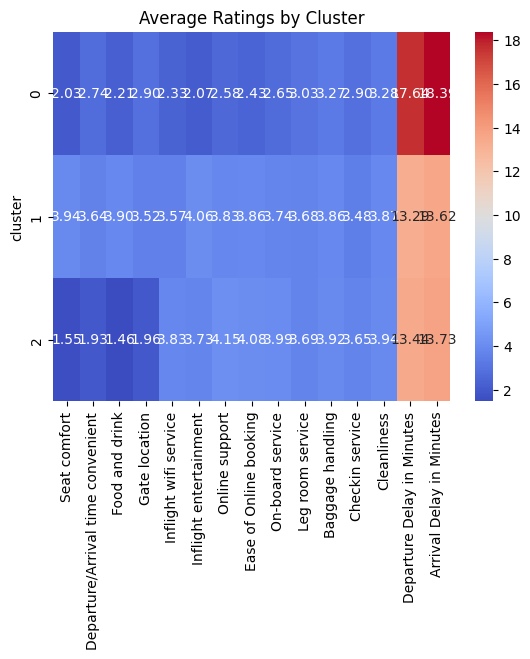

In [ ]:
sns.heatmap(cluster_means, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Average Ratings by Cluster')
plt.show()

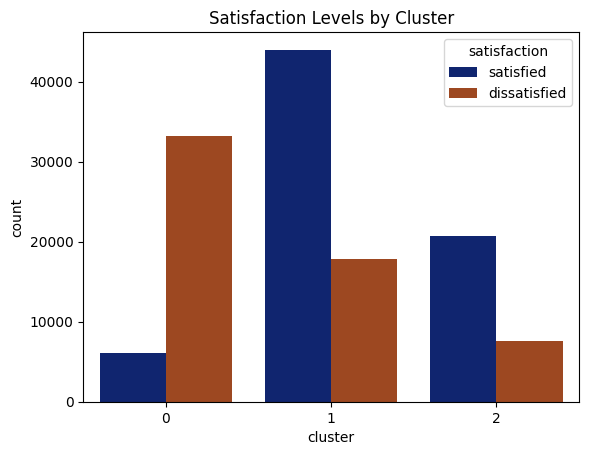

In [ ]:
sns.countplot(data=flight_df, x='cluster', hue='satisfaction', palette='dark') # Changed df_clean to flight_df
plt.title('Satisfaction Levels by Cluster')
plt.show()

### **FOCUSING ON THE ONLINE EXPERIENCE**

* ***Features to look at***
1. Online boarding
2. Online support
3. Ease of online booking


* ***Ideas to test***
1. Online Correlation
3. Online support to Online boarding
4. Ease of online booking to Online boarding


*   ***Visuals***
1. Heatmaps
2. Plots
3. Linear regressions
4. Cluster




In [ ]:
online_features_df = flight_df[['Online boarding', 'Online support', 'Ease of Online booking', 'satisfaction']]
online_features_df

,Online boarding,Online support,Ease of Online booking,satisfaction
0,2,2,3,satisfied
1,2,2,3,satisfied
2,2,2,2,satisfied
3,3,3,1,satisfied
4,5,4,2,satisfied
...,...,...,...,...
129875,2,2,2,satisfied
129876,1,1,3,dissatisfied
129877,2,2,4,dissatisfied
129878,2,2,3,dissatisfied


In [ ]:
online_features_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129487 entries, 0 to 129879
Data columns (total 4 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Online boarding         129487 non-null  int64 
 1   Online support          129487 non-null  int64 
 2   Ease of Online booking  129487 non-null  int64 
 3   satisfaction            129487 non-null  object
dtypes: int64(3), object(1)
memory usage: 4.9+ MB


In [ ]:
online_features_df.describe()

,Online boarding,Online support,Ease of Online booking
count,129487.000000,129487.000000,129487.000000
mean,3.352545,3.519967,3.472171
std,1.298624,1.306326,1.305573
min,0.000000,0.000000,0.000000
25%,2.000000,3.000000,2.000000
50%,4.000000,4.000000,4.000000
75%,4.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000


In [ ]:
online_features_df.loc[:, 'satisfaction_encoded'] = online_features_df['satisfaction'].apply(
    lambda x: 1 if x == 'satisfied' else 0
)

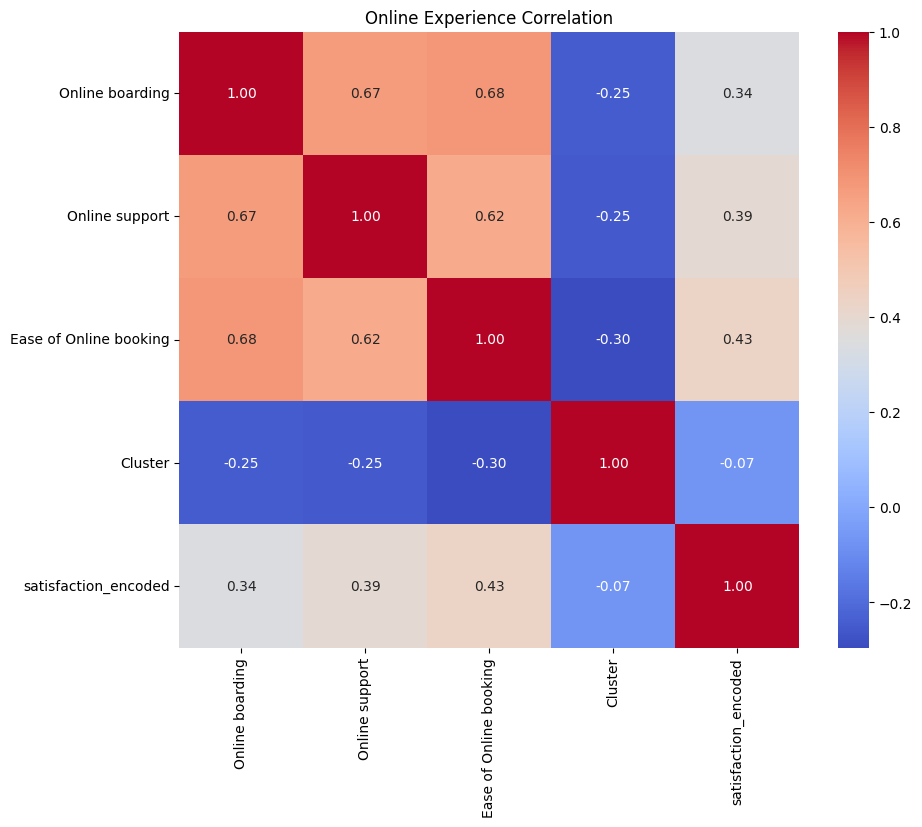

In [ ]:
corr = online_features_df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Online Experience Correlation')
plt.show()

Slope: 0.67
Intercept: 1.26


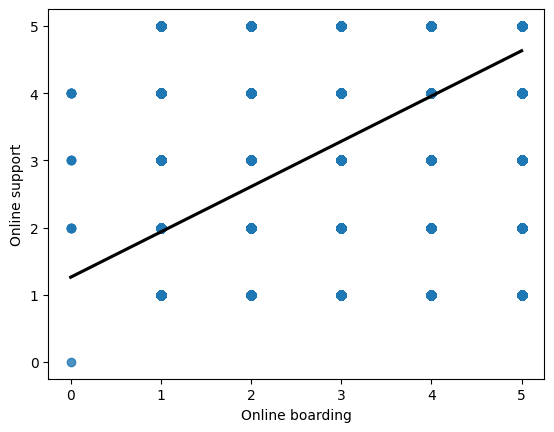

In [ ]:
from sklearn.linear_model import LinearRegression

sns.regplot(data=online_features_df, x='Online boarding', y='Online support', line_kws={'color': 'black'})

X = online_features_df[['Online boarding']]
y = online_features_df['Online support']

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_

print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")

plt.show()


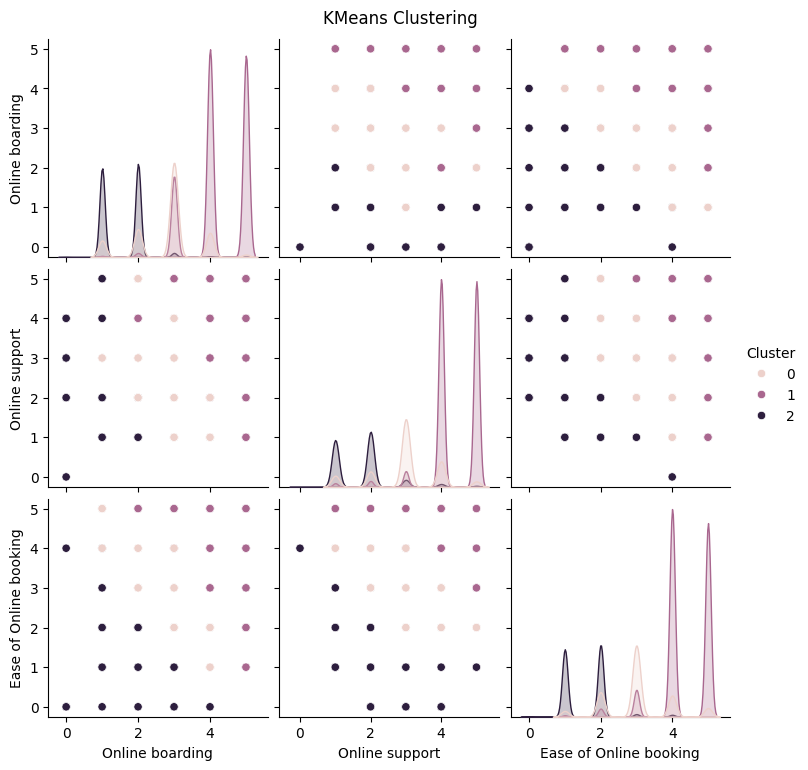

In [ ]:
X_cluster = online_features_df.loc[:,['Online boarding', 'Online support', 'Ease of Online booking']]

kmeans = KMeans(n_clusters=3, random_state=42)
online_features_df['Cluster'] = kmeans.fit_predict(X_cluster)

sns.pairplot(online_features_df, vars=X_cluster.columns, hue='Cluster')
plt.suptitle("KMeans Clustering", y=1.02)
plt.show()

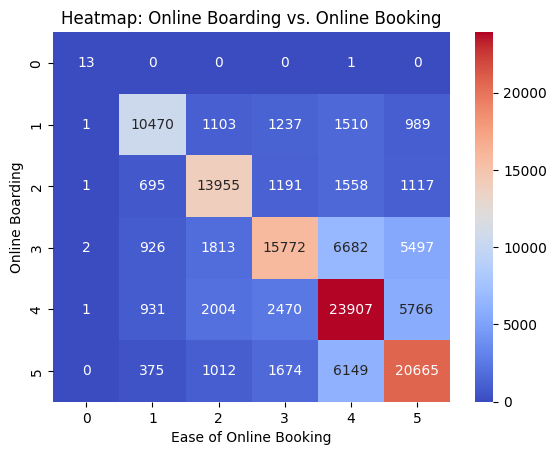

In [ ]:
pivot = pd.pivot_table(online_features_df, index='Online boarding', columns='Ease of Online booking', aggfunc='size', fill_value=0)

sns.heatmap(pivot, cmap='coolwarm', annot=True, fmt='d')
plt.title("Heatmap: Online Boarding vs. Online Booking")
plt.xlabel("Ease of Online Booking")
plt.ylabel("Online Boarding")
plt.show()

In [ ]:
satisfied = online_features_df[online_features_df['satisfaction_encoded'] == 1]['Ease of Online booking']
unsatisfied = online_features_df[online_features_df['satisfaction_encoded'] == 0]['Ease of Online booking']


t_stat, p_val = ttest_ind(satisfied, unsatisfied, equal_var=False)
print(f"T-statistic: {t_stat:.3f}, p-value: {p_val:.4f}")

T-statistic: 169.117, p-value: 0.0000


### **FOCUSING ON INFLIGHT EXPERIENCE**

* ***Features to look at***
1. Seat Comfort
2. Inflight Wifi service
3. Inflight Enteraiment
4. Food and drink
5. On-board Service
6. satisfaction

* ***Ideas to test***
1. satisfied and Dissatisfied
2. Seat comfort to classes
3. inflight features to satisfaction
4. seat comfort to satisfaction


*   ***Visuals***
1. Linear Regression
2. Plots
3. Heatmap
4. cluster kmean


In [ ]:
inflight_features = flight_df[['Seat comfort', 'Inflight wifi service', 'Inflight entertainment', 'Food and drink', 'On-board service', 'satisfaction']]
inflight_features.head()

,Seat comfort,Inflight wifi service,Inflight entertainment,Food and drink,On-board service,satisfaction
0,0,2,4,0,3,satisfied
1,0,0,2,0,4,satisfied
2,0,2,0,0,3,satisfied
3,0,3,4,0,1,satisfied
4,0,4,3,0,2,satisfied


In [ ]:
inflight_features = inflight_features.dropna()
inflight_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129487 entries, 0 to 129879
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Seat comfort            129487 non-null  int64 
 1   Inflight wifi service   129487 non-null  int64 
 2   Inflight entertainment  129487 non-null  int64 
 3   Food and drink          129487 non-null  int64 
 4   On-board service        129487 non-null  int64 
 5   satisfaction            129487 non-null  object
dtypes: int64(5), object(1)
memory usage: 6.9+ MB


In [ ]:
inflight_features.loc[:, 'satisfaction_encoded'] = inflight_features['satisfaction'].apply(
    lambda x: 1 if x == 'satisfied' else 0
)

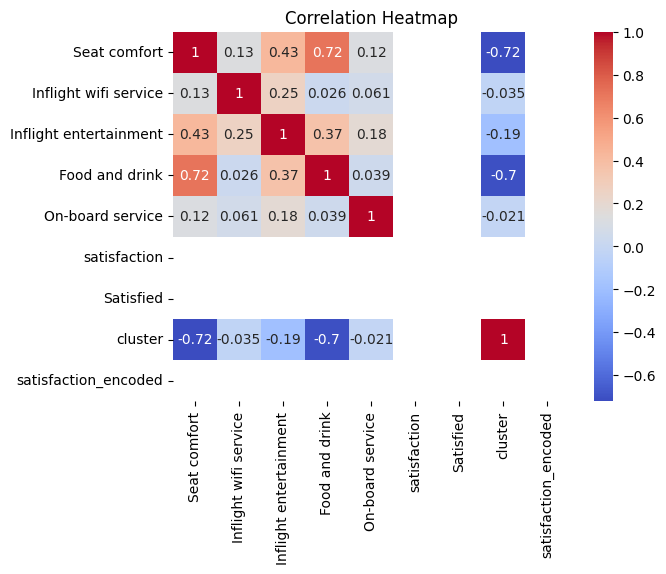

In [ ]:
sns.heatmap(inflight_features.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

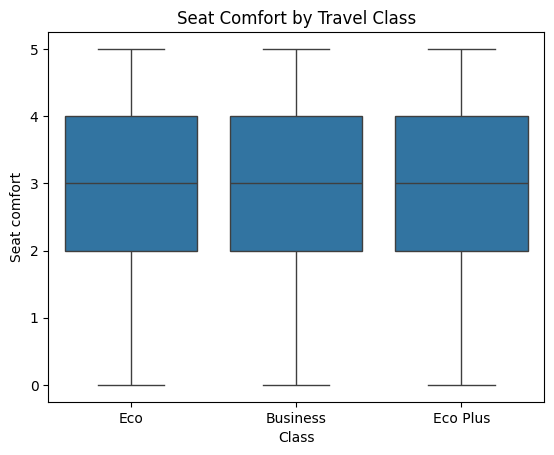

In [ ]:
sns.boxplot(x='Class', y='Seat comfort', data=flight_df)
plt.title("Seat Comfort by Travel Class")
plt.show()

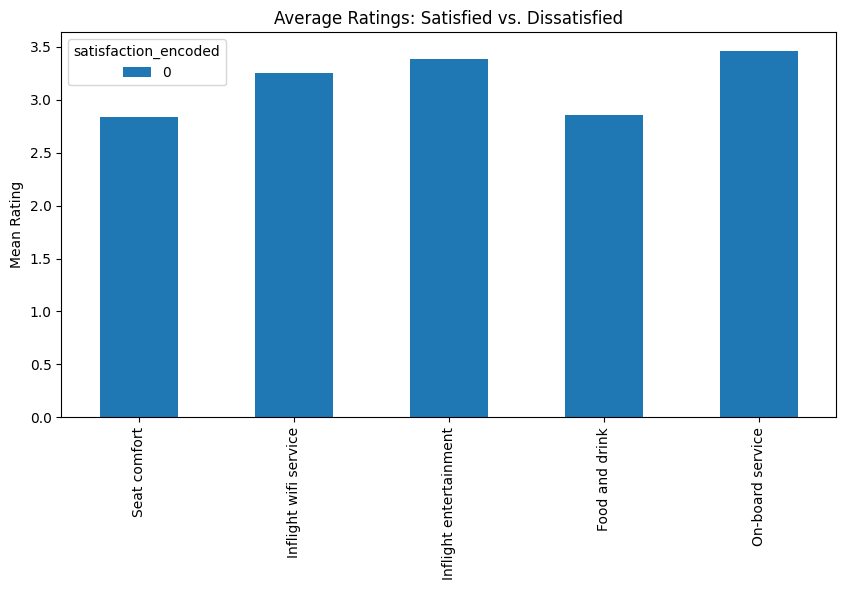

In [ ]:
mean_diff = inflight_features.groupby('satisfaction_encoded')[['Seat comfort', 'Inflight wifi service', 'Inflight entertainment', 'Food and drink', 'On-board service']].mean().T
mean_diff.plot(kind='bar', figsize=(10, 5), title='Average Ratings: Satisfied vs. Dissatisfied')
plt.ylabel("Mean Rating")
plt.show()

<Axes: xlabel='Seat comfort', ylabel='satisfaction_encoded'>

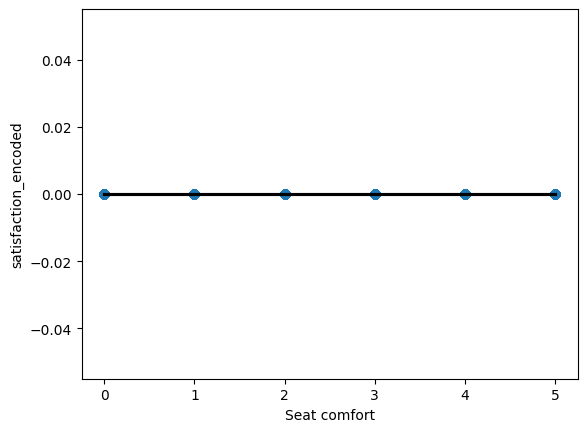

In [ ]:
sns.regplot(inflight_features, x='Seat comfort', y='satisfaction_encoded', line_kws={'color': 'black'})

/usr/local/lib/python3.11/dist-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


T-test: t-stat = nan, p-value = nan


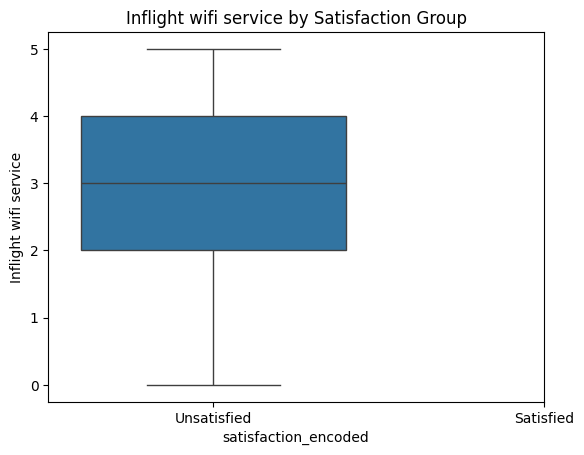

In [ ]:
group1 = inflight_features[inflight_features['satisfaction_encoded'] == 1]['Inflight wifi service']
group2 = inflight_features[inflight_features['satisfaction_encoded'] == 0]['Inflight wifi service']

t_stat, p_val = stats.ttest_ind(group1, group2)
print(f"T-test: t-stat = {t_stat}, p-value = {p_val}")

sns.boxplot(x='satisfaction_encoded', y='Inflight wifi service', data=inflight_features)
plt.xticks([0, 1], ['Unsatisfied', 'Satisfied'])
plt.title("Inflight wifi service by Satisfaction Group")
plt.show()

cluster                        0         1         2
Seat comfort            3.921053  1.951816  1.580225
Inflight wifi service   3.558776  2.383341  3.814736
Inflight entertainment  4.041575  1.953422  3.966688
Food and drink          3.899088  2.106031  1.465835
On-board service        3.690991  2.814792  3.906097
satisfaction                 NaN       NaN       NaN
Satisfied               1.000000  1.000000  1.000000
satisfaction_encoded    0.000000  0.000000  0.000000


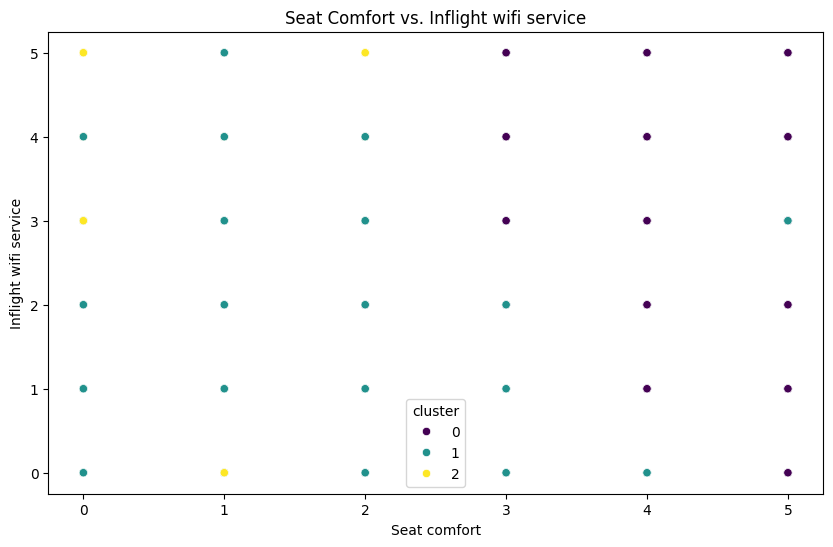

In [ ]:
kmeans = KMeans(n_clusters=3, n_init='auto')
inflight_features['cluster'] = kmeans.fit_predict(inflight_features[['Seat comfort', 'Inflight wifi service', 'Inflight entertainment', 'Food and drink', 'On-board service']])
result = inflight_features.groupby('cluster').mean().T
print(result)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=inflight_features, x='Seat comfort', y='Inflight wifi service', hue='cluster', palette='viridis')
plt.title('Seat Comfort vs. Inflight wifi service')
plt.show()

## **FOCUSING ON FLIGHT EXPERIENCE**
* ***Features to look at***
1. Baggage handling
2. Checkin service
3. Gate location
4. Cleaniness
5. Depature Delay in Minutes
6. Arrival Delay in Minutes
* ***Ideas to test***
1. delay to satisfaction
2. delay to services
* ***Visuals***
1. scatter plots
2. Histograms

In [ ]:
inflight_experience = flight_df[['Baggage handling', 'Checkin service', 'Gate location', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction']]
inflight_experience.head()

,Baggage handling,Checkin service,Gate location,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,3,5,2,3,0,0.0,satisfied
1,4,2,3,3,310,305.0,satisfied
2,4,4,3,4,0,0.0,satisfied
3,1,4,3,1,0,0.0,satisfied
4,2,4,3,2,0,0.0,satisfied


In [ ]:
inflight_experience.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129487 entries, 0 to 129879
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Baggage handling            129487 non-null  int64  
 1   Checkin service             129487 non-null  int64  
 2   Gate location               129487 non-null  int64  
 3   Cleanliness                 129487 non-null  int64  
 4   Departure Delay in Minutes  129487 non-null  int64  
 5   Arrival Delay in Minutes    129487 non-null  float64
 6   satisfaction                129487 non-null  object 
dtypes: float64(1), int64(5), object(1)
memory usage: 7.9+ MB


In [ ]:
inflight_experience.describe()

,Baggage handling,Checkin service,Gate location,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,3.695460,3.340729,2.990377,3.705886,14.643385,15.091129
std,1.156487,1.260561,1.305917,1.151683,37.932867,38.465650
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,2.000000,3.000000,0.000000,0.000000
50%,4.000000,3.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,4.000000,4.000000,5.000000,12.000000,13.000000
max,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


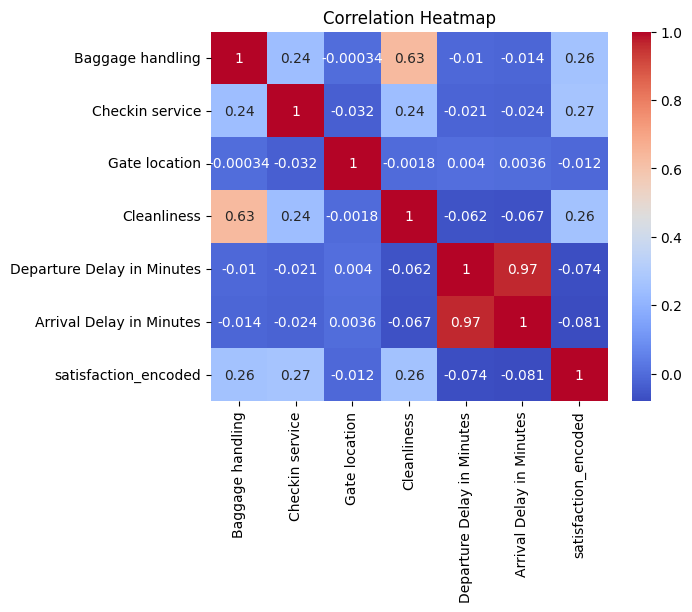

In [ ]:
sns.heatmap(inflight_experience.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

- baggage  handling has the strongest postive impact on passengers satisfaction
- checkin service and gate location are weak postive correlation with baggage but weak negative with satisfaction
- cleanliness, Departure and arrival delay are very weak negative correlation with most of the other categories meaning they impact the satisfactions of the passengers

In [ ]:
inflight_experience.loc[:, 'satisfaction_encoded'] = inflight_experience['satisfaction'].apply(
    lambda x: 1 if x == 'satisfied' else 0
)

In [ ]:
inflight_experience[['Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction_encoded']].corr()

,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction_encoded
Departure Delay in Minutes,1.000000,0.965291,-0.073960
Arrival Delay in Minutes,0.965291,1.000000,-0.080691
satisfaction_encoded,-0.073960,-0.080691,1.000000


In [ ]:
corr_dep, p_dep= stats.pearsonr(inflight_experience['Departure Delay in Minutes'], inflight_experience['satisfaction_encoded'])
corr_arr, p_arr = stats.pearsonr(inflight_experience['Arrival Delay in Minutes'], inflight_experience['satisfaction_encoded'])
print(f"Correlation between Departure Delay and Satisfaction: {corr_dep:.2f}, p-value: {p_dep:.4f}")
print(f"Correlation between Arrival Delay and Satisfaction: {corr_arr:.2f}, p-value: {p_arr:.4f}")

Correlation between Departure Delay and Satisfaction: -0.07, p-value: 0.0000
Correlation between Arrival Delay and Satisfaction: -0.08, p-value: 0.0000


-  if depature delays increase then satisfaction decreases
-  if arrival delays increase then satisfaction decreases  

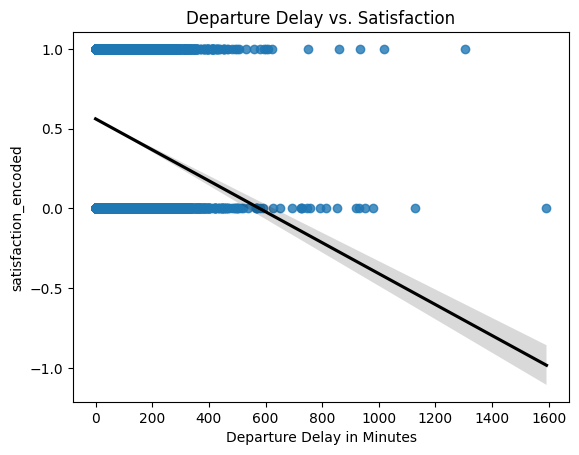

In [ ]:
sns.regplot(data=inflight_experience, x='Departure Delay in Minutes', y='satisfaction_encoded', line_kws={'color': 'black'})
plt.title('Departure Delay vs. Satisfaction')
plt.show()

* This just confrims the satisfaction  of the decrease if increase is arised in depature delays.

In [ ]:
grouped = inflight_experience.groupby('Departure Delay in Minutes')['satisfaction_encoded'].mean()
print(grouped)

Departure Delay in Minutes
0       0.572443
1       0.570144
2       0.576098
3       0.547826
4       0.546127
          ...   
978     0.000000
1017    1.000000
1128    0.000000
1305    1.000000
1592    0.000000
Name: satisfaction_encoded, Length: 464, dtype: float64


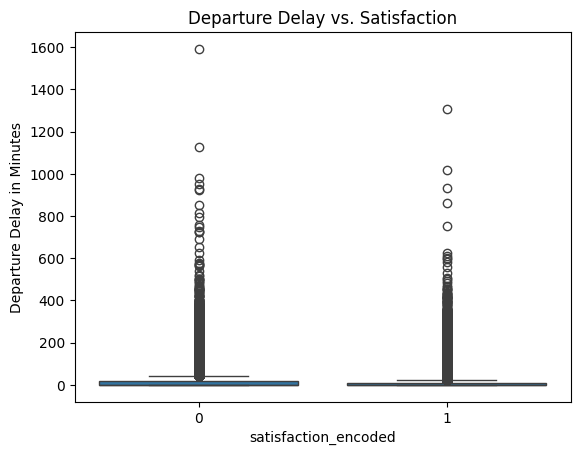

In [ ]:
sns.boxplot(x='satisfaction_encoded', y='Departure Delay in Minutes', data=inflight_experience)
plt.title('Departure Delay vs. Satisfaction')
plt.show()

* Here we can see that passengers with shorter departure delays tend to be satisfed (0 = not satisfied  1= satisfied)

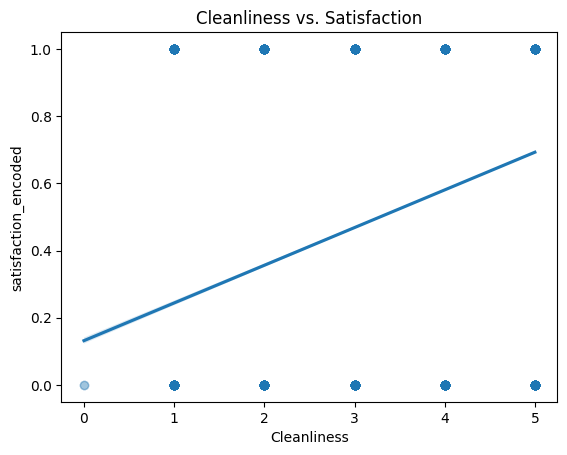

R-squared: 0.07, p-value: 0.0000


In [ ]:
sns.regplot(x = 'Cleanliness', y = 'satisfaction_encoded', data = inflight_experience, scatter_kws={'alpha':0.1})
plt.title('Cleanliness vs. Satisfaction')
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(inflight_experience['Cleanliness'], inflight_experience['satisfaction_encoded'])
print(f"R-squared: {r_value**2:.2f}, p-value: {p_value:.4f}")

* cleaniess has proving that it can increase the satisfaction of passengers

In [ ]:
satisfied = inflight_experience[inflight_experience['satisfaction_encoded'] == 1]['Departure Delay in Minutes']
unsatisfied = inflight_experience[inflight_experience['satisfaction_encoded'] == 0]['Departure Delay in Minutes']


t_stat, p_val = ttest_ind(satisfied, unsatisfied, equal_var=False)
print(f"T-statistic: {t_stat:.3f}, p-value: {p_val:.4f}")

T-statistic: -25.989, p-value: 0.0000


In [ ]:
satisfied = inflight_experience[inflight_experience['satisfaction_encoded'] == 1]['Cleanliness']
unsatisfied = inflight_experience[inflight_experience['satisfaction_encoded'] == 0]['Cleanliness']


t_stat, p_val = ttest_ind(satisfied, unsatisfied, equal_var=False)
print(f"T-statistic: {t_stat:.3f}, p-value: {p_val:.4f}")

T-statistic: 96.212, p-value: 0.0000


In [ ]:
satisfied = inflight_experience[inflight_experience['satisfaction_encoded'] == 1]['Baggage handling']
unsatisfied = inflight_experience[inflight_experience['satisfaction_encoded'] == 0]['Baggage handling']


t_stat, p_val = ttest_ind(satisfied, unsatisfied, equal_var=False)
print(f"T-statistic: {t_stat:.3f}, p-value: {p_val:.4f}")

T-statistic: 96.700, p-value: 0.0000


In [ ]:
satisfied = inflight_experience[inflight_experience['satisfaction_encoded'] == 1]['Checkin service']
unsatisfied = inflight_experience[inflight_experience['satisfaction_encoded'] == 0]['Checkin service']


t_stat, p_val = ttest_ind(satisfied, unsatisfied, equal_var=False)
print(f"T-statistic: {t_stat:.3f}, p-value: {p_val:.4f}")

T-statistic: 98.401, p-value: 0.0000


In [ ]:
satisfied = inflight_experience[inflight_experience['satisfaction_encoded'] == 1]['Gate location']
unsatisfied = inflight_experience[inflight_experience['satisfaction_encoded'] == 0]['Gate location']


t_stat, p_val = ttest_ind(satisfied, unsatisfied, equal_var=False)
print(f"T-statistic: {t_stat:.3f}, p-value: {p_val:.4f}")

T-statistic: -4.468, p-value: 0.0000
